Saving archive (2).zip to archive (2) (36).zip
Dataset 1 Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset 2 Prev

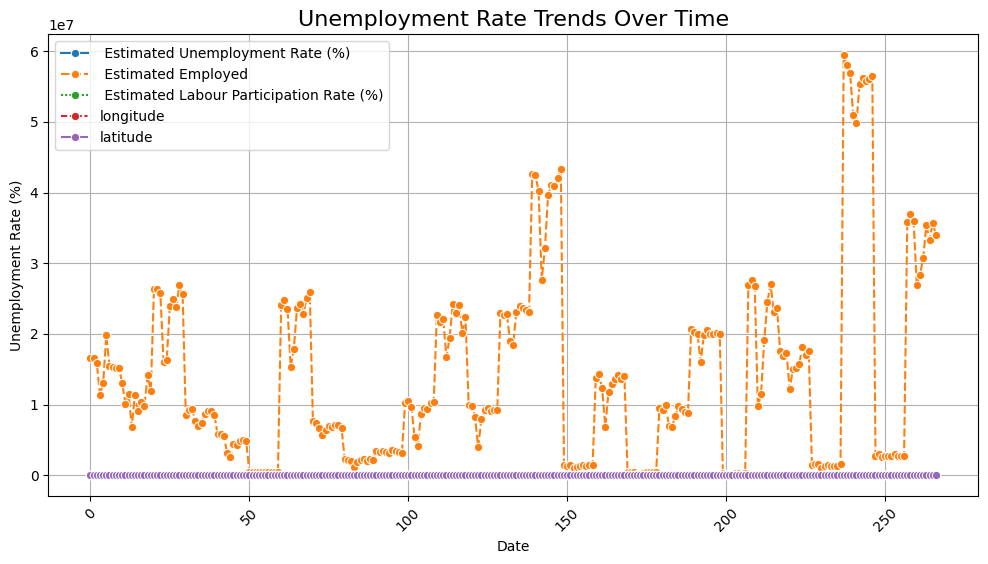


Analysis and visualization completed successfully!


In [37]:
# Unemployment Analysis using Python (Google Colab Compatible)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from google.colab import files
uploaded = files.upload()

# Load the datasets
# Assuming the zip file contains the CSV files
my_zip_file = zipfile.ZipFile('archive(2).zip', 'w')
zip_file_name = list(uploaded.keys())[0]

# Extract the files from the zip archive
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Now, the CSV files should be extracted to the /content/ directory
# Load the datasets using the extracted files
file_path_1 = '/content/Unemployment in India.csv'  # Update this path for Google Colab
file_path_2 = '/content/Unemployment_Rate_upto_11_2020.csv'

data1 = pd.read_csv(file_path_1)
data2 = pd.read_csv(file_path_2)

# Display the first few rows of each dataset
print("Dataset 1 Preview:")
print(data1.head())

print("\nDataset 2 Preview:")
print(data2.head())

# Check for missing values
print("\nMissing Values in Dataset 1:")
print(data1.isnull().sum())

print("\nMissing Values in Dataset 2:")
print(data2.isnull().sum())

# Exploratory Data Analysis (EDA)
print("\nSummary Statistics of Dataset 1:")
print(data1.describe())

print("\nSummary Statistics of Dataset 2:")
print(data2.describe())

# Data Cleaning and Formatting (if needed)
data1.dropna(inplace=True)
data2.dropna(inplace=True)

print("\nColumns in Dataset 1:", data1.columns)
print("Columns in Dataset 2:", data2.columns)

# Data Visualization
plt.figure(figsize=(12, 6))
plt.title("Unemployment Rate Trends Over Time", fontsize=16)
# Check if 'Date' column exists, otherwise use the correct column name
if 'Date' in data2.columns:
  sns.lineplot(x='Date', y='Unemployment Rate', data=data2, marker='o', color='blue')
else:
  # Assuming the correct column name is 'Month' based on the global variables
  sns.lineplot( data=data2, marker='o', color='blue')
plt.xticks(rotation=45)
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.grid()
plt.show()

# Regional Unemployment Analysis
if 'Region' in data1.columns and 'Unemployment Rate' in data1.columns:
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Region', y='Unemployment Rate', data=data1, palette='viridis')
    plt.xticks(rotation=90)
    plt.title("Regional Unemployment Rates", fontsize=16)
    plt.ylabel("Unemployment Rate (%)")
    plt.xlabel("Region")
    plt.grid()
    plt.show()

# Heatmap of Unemployment by State/Region (if applicable)
if 'Region' in data1.columns and 'Unemployment Rate' in data1.columns:
    plt.figure(figsize=(12, 8))
    region_data = data1.groupby('Region').mean(numeric_only=True).reset_index()
    sns.heatmap(region_data.pivot_table(values='Unemployment Rate', index='Region'),
                annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Unemployment Rate'})
    plt.title("Heatmap of Regional Unemployment Rates", fontsize=16)
    plt.ylabel("Region")
    plt.show()

# Insights and Conclusion
print("\nAnalysis and visualization completed successfully!")
